In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# Loading Datasets and creating DataFrames

df_t = pd.read_csv('SAML-D.csv')

In [3]:
df_t.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [4]:
df_t.shape

(9504852, 12)

In [5]:
# Checking for missing values
df_t.notnull().sum()

Time                      9504852
Date                      9504852
Sender_account            9504852
Receiver_account          9504852
Amount                    9504852
Payment_currency          9504852
Received_currency         9504852
Sender_bank_location      9504852
Receiver_bank_location    9504852
Payment_type              9504852
Is_laundering             9504852
Laundering_type           9504852
dtype: int64

In [6]:
df_t.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [7]:
df_t.keys()

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type'],
      dtype='object')

In [8]:
df_t.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

In [9]:
df_t['Time'].describe()

count      9504852
unique       86400
top       15:22:42
freq           201
Name: Time, dtype: object

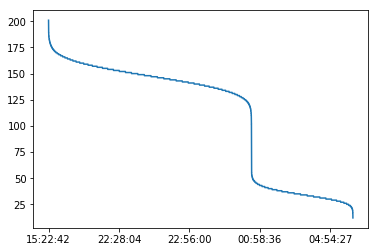

In [10]:
df_t['Time'].value_counts().plot(kind='line')

In [11]:
df_t['Date'].describe()

count        9504852
unique           321
top       2023-02-09
freq           36645
Name: Date, dtype: object

In [12]:
df_t['Date'].value_counts()

2023-02-09    36645
2023-02-01    35910
2023-02-06    35038
2023-02-22    34566
2022-12-23    34156
              ...  
2022-12-31    25808
2022-10-30    25298
2022-10-23    23719
2022-10-07    20892
2023-08-23     8400
Name: Date, Length: 321, dtype: int64

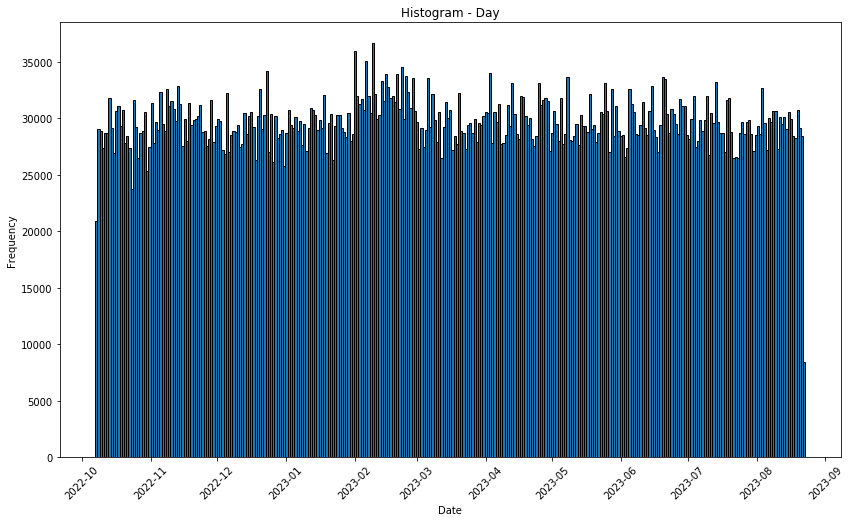

In [13]:
# Converting the attribute into datetime dtype
days = pd.to_datetime(df_t['Date'])

# Plot histogram
plt.figure(figsize=(14, 8))
#plt.hist(days_transactions, bins=len(days_transactions.unique()))
plt.hist(days, bins=len(days.unique()), edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram - Day')
plt.xticks(rotation=45)
plt.show()

In [14]:
df_t['Sender_account'].describe()

count    9.504852e+06
mean     5.006619e+09
std      2.885814e+09
min      9.018000e+03
25%      2.513133e+09
50%      5.001017e+09
75%      7.505051e+09
max      9.999987e+09
Name: Sender_account, dtype: float64

In [15]:
df_t['Sender_account'].value_counts()

4808614002    754
2938210715    753
5579295130    751
2357599526    749
3831533348    749
             ... 
5364650131      1
1081353812      1
598236635       1
5262466443      1
5196793831      1
Name: Sender_account, Length: 292715, dtype: int64

Text(0.5, 1.0, 'Top 25 Bank Sender by Frequency of Transactions')

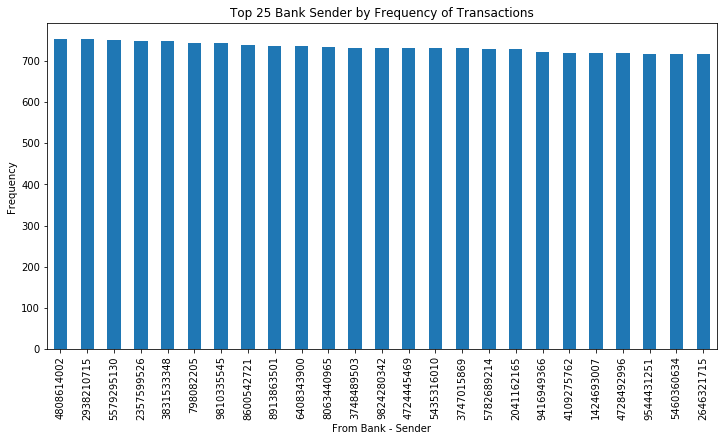

In [16]:
# Visualising the Top 25 Sender's Bank by Frequency of Transactions

plt.figure(figsize=(12, 6))
df_t['Sender_account'].value_counts().head(25).plot(kind='bar')

# Label the axes and add a title
plt.xlabel('From Bank - Sender')
plt.ylabel('Frequency')
plt.title('Top 25 Bank Sender by Frequency of Transactions')

In [17]:
df_t['Receiver_account'].describe()

count    9.504852e+06
mean     5.006006e+09
std      2.884763e+09
min      9.018000e+03
25%      2.513219e+09
50%      5.002572e+09
75%      7.502397e+09
max      9.999971e+09
Name: Receiver_account, dtype: float64

In [18]:
df_t['Receiver_account'].value_counts()

8600542721    751
2938210715    745
5460360634    740
5579295130    739
4808614002    737
             ... 
7063289464      1
5986715112      1
1120485786      1
2035380551      1
8711894141      1
Name: Receiver_account, Length: 652266, dtype: int64

Text(0.5, 1.0, 'Top 25 Bank RECEIVER by Frequency of Transactions')

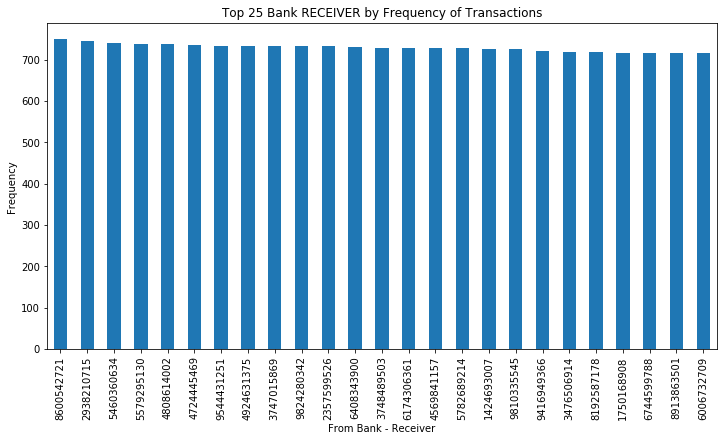

In [19]:
# Visualising the Top 25 Receiver's Bank by Frequency of Transactions

plt.figure(figsize=(12, 6))
df_t['Receiver_account'].value_counts().head(25).plot(kind='bar')

# Label the axes and add a title
plt.xlabel('From Bank - Receiver')
plt.ylabel('Frequency')
plt.title('Top 25 Bank RECEIVER by Frequency of Transactions')

In [20]:
# Set the display format to avoid scientific notation
pd.options.display.float_format = '{:.0f}'.format

df_t['Amount'].describe()

count    9504852
mean        8763
std        25615
min            4
25%         2144
50%         6114
75%        10458
max     12618498
Name: Amount, dtype: float64

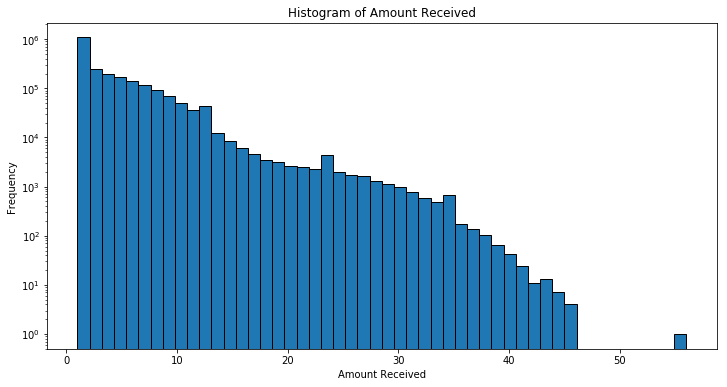

In [21]:
#Visualisation 
plt.figure(figsize=(12, 6))
df_t['Amount'].value_counts().plot(kind ='hist', bins = 50, edgecolor='black', log=True)

# Label the axes and add a title
plt.xlabel('Amount Received')
plt.ylabel('Frequency')
plt.title('Histogram of Amount Received')

# Display the plot
plt.show()

In [22]:
df_t['Payment_currency'].describe()

count       9504852
unique           13
top       UK pounds
freq        9099293
Name: Payment_currency, dtype: object

In [23]:
df_t['Payment_currency'].value_counts()

UK pounds          9099293
Euro                117164
Turkish lira         27996
Swiss franc          27492
Dirham               27263
Pakistani rupee      27196
Naira                27143
US dollar            26061
Yen                  25562
Moroccan dirham      25395
Mexican Peso         24852
Albanian lek         24778
Indian rupee         24657
Name: Payment_currency, dtype: int64

In [24]:
df_t['Received_currency'].describe()

count       9504852
unique           13
top       UK pounds
freq        8783655
Name: Received_currency, dtype: object

In [25]:
df_t['Received_currency'].value_counts()

UK pounds          8783655
Euro                231911
Pakistani rupee      45993
Yen                  45814
Moroccan dirham      45748
Albanian lek         45736
Mexican Peso         45255
Naira                45046
Indian rupee         43757
US dollar            43664
Swiss franc          42931
Dirham               42797
Turkish lira         42545
Name: Received_currency, dtype: int64

In [26]:
df_t['Sender_bank_location'].describe()

count     9504852
unique         18
top            UK
freq      9183088
Name: Sender_bank_location, dtype: object

In [27]:
df_t['Sender_bank_location'].value_counts()

UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Albania          17648
India            17596
Netherlands      16770
Name: Sender_bank_location, dtype: int64

In [28]:
df_t['Receiver_bank_location'].describe()

count     9504852
unique         18
top            UK
freq      8864634
Name: Receiver_bank_location, dtype: object

In [29]:
df_t['Receiver_bank_location'].value_counts()

UK             8864634
Pakistan         38980
Austria          38844
Albania          38783
Japan            38729
Morocco          38704
Germany          38540
France           38512
Mexico           38385
Nigeria          38272
Netherlands      37314
Spain            37288
India            36936
USA              36850
Italy            36517
Switzerland      36081
UAE              35897
Turkey           35586
Name: Receiver_bank_location, dtype: int64

In [30]:
df_t['Payment_type'].describe()

count         9504852
unique              7
top       Credit card
freq          2012909
Name: Payment_type, dtype: object

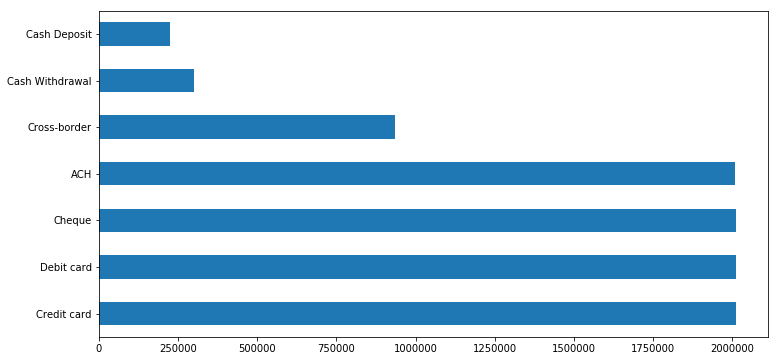

In [31]:
plt.figure(figsize=(12, 6))

df_t['Payment_type'].value_counts().plot(kind='barh')

plt.show()

In [32]:
df_t['Laundering_type'].describe()

count                  9504852
unique                      28
top       Normal_Small_Fan_Out
freq                   3477717
Name: Laundering_type, dtype: object

In [33]:
df_t['Laundering_type'].value_counts()

Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing                 54
Name: Laundering_type, dtype: int64

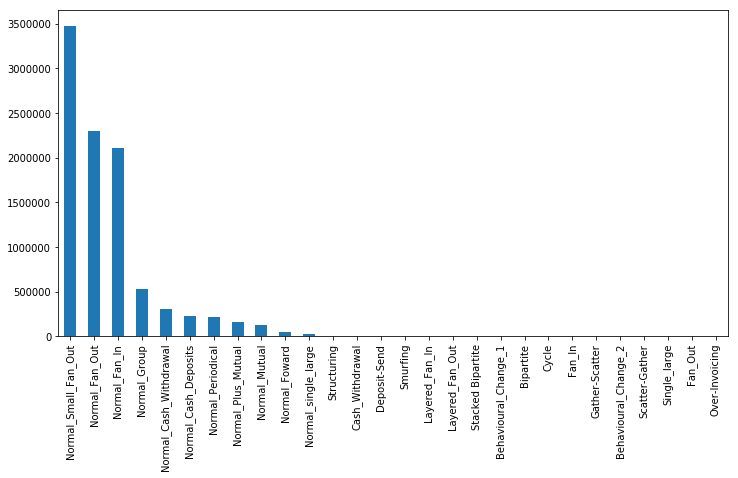

In [34]:
plt.figure(figsize=(12, 6))
df_t['Laundering_type'].value_counts().plot(kind = 'bar')

plt.show()

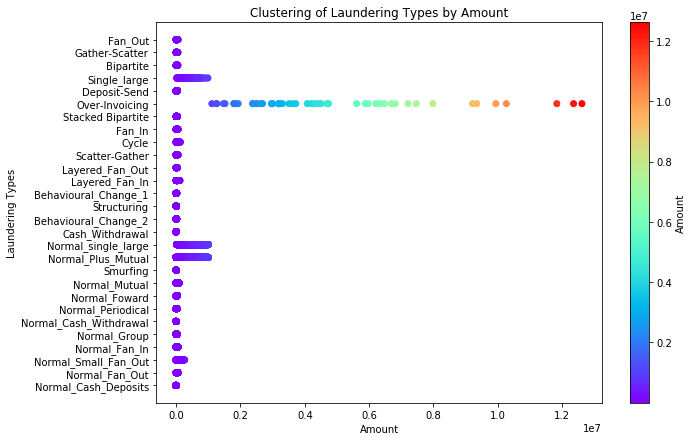

In [5]:
import matplotlib.pyplot as plt

# Define the figure size correctly
plt.figure(figsize=(10, 7))

# Create scatter plot
plt.scatter(df_t['Amount'], df_t['Laundering_type'], c=df_t['Amount'], cmap='rainbow')

# Add a title to the plot
plt.title('Clustering of Laundering Types by Amount')

# Label the axes
plt.xlabel('Amount')
plt.ylabel('Laundering Types')

# Add a color bar to indicate the color mapping
plt.colorbar(label='Amount')

# Display the plot
plt.show()


In [35]:
df_t['Is_laundering'].describe()

count   9504852
mean          0
std           0
min           0
25%           0
50%           0
75%           0
max           1
Name: Is_laundering, dtype: float64

In [36]:
df_t['Is_laundering'].value_counts()

0    9494979
1       9873
Name: Is_laundering, dtype: int64

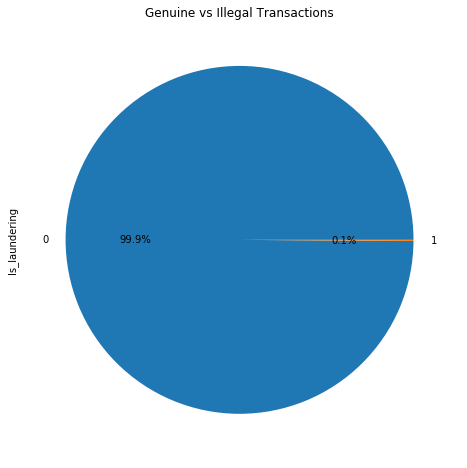

In [37]:
plt.figure(figsize=(8, 8))
df_t['Is_laundering'].value_counts().plot(kind='pie', autopct='%1.1f%%', title = 'Genuine vs Illegal Transactions')
plt.show()

In [38]:
df_t.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

# Normalisation

In [39]:
#  Convert 'Date' to a numerical format 
df_t['Date'] = pd.to_datetime(df_t['Date'])
df_t['Date'] = df_t['Date'].map(pd.Timestamp.timestamp)

In [40]:
# If 'Time' is in a datetime format or string, convert to seconds since start of the day
df_t['Time'] = pd.to_datetime(df_t['Time'], format='%H:%M:%S').dt.time.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


In [41]:
df_t.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,38119,1665100800,8724731955,2769355426,1459,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,38120,1665100800,1491989064,8401255335,6020,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,38120,1665100800,287305149,4404767002,14328,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,38121,1665100800,5376652437,9600420220,11895,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,38121,1665100800,9614186178,3803336972,115,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [42]:
df_t.dtypes

Time                        int64
Date                      float64
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

In [43]:
# Converting Categorical Data into numercial data
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

columns_to_encode = ['Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type','Laundering_type']

for column in columns_to_encode:
    df_t[column] = LE.fit_transform(df_t[column])

In [44]:
df_t.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,38119,1665100800,8724731955,2769355426,1459,10,10,16,16,1,0,11
1,38120,1665100800,1491989064,8401255335,6020,10,1,16,15,5,0,14
2,38120,1665100800,287305149,4404767002,14328,10,10,16,16,3,0,20
3,38121,1665100800,5376652437,9600420220,11895,10,10,16,16,0,0,13
4,38121,1665100800,9614186178,3803336972,115,10,10,16,16,1,0,11


In [49]:
# Applying Standard Scaler for Normalisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_norm = ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type','Laundering_type']


# Apply the StandardScaler to each column individually
for column in columns_to_norm:
    # Apply StandardScaler to each column
    df_t[column] = scaler.fit_transform(df_t[[column]])
    
    # Clip values to ensure they are within the range [-1, 1]
    df_t[column] = np.clip(df_t[column], -1, 1)

df_t

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,-0.716449,-1.0,1.000000,-0.775333,-0.285139,0.171435,0.23455,0.156459,0.226096,-1.000000,0,-1.000000
1,-0.716400,-1.0,-1.000000,1.000000,-0.107099,0.171435,-1.00000,0.156459,-0.191672,0.793335,0,-0.678404
2,-0.716400,-1.0,-1.000000,-0.208419,0.217274,0.171435,0.23455,0.156459,0.226096,-0.156956,0,1.000000
3,-0.716352,-1.0,0.128225,1.000000,0.122274,0.171435,0.23455,0.156459,0.226096,-1.000000,0,-0.989758
4,-0.716352,-1.0,1.000000,-0.416904,-0.337604,0.171435,0.23455,0.156459,0.226096,-1.000000,0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,-0.653242,1.0,-0.884564,-1.000000,-0.254372,0.171435,0.23455,0.156459,0.226096,-1.000000,0,1.000000
9504848,-0.652999,1.0,1.000000,0.142335,-0.305907,0.171435,0.23455,0.156459,0.226096,1.000000,0,1.000000
9504849,-0.652999,1.0,0.788586,-0.696931,-0.285295,0.171435,0.23455,0.156459,0.226096,-1.000000,0,1.000000
9504850,-0.652756,1.0,-1.000000,-0.066970,0.672761,0.171435,0.23455,0.156459,0.226096,-1.000000,0,-0.989758


In [52]:
# Creating new file to avoid errors - Used for StandardScaler

#norm_li_st.to_csv('transactions_norm_standardscaler.csv', index= False)

In [50]:
# Applying MinMax Scaler for Normalisation

from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

columns_to_norm = ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type','Laundering_type']


# Apply the StandardScaler to each column individually
for column in columns_to_norm:
    df_t[column] = scaler_minmax.fit_transform(df_t[[column]])
    
    
df_t

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,0,0,1,0,0,1,1,1,1,0,0,0
1,0,0,0,1,0,1,0,1,1,1,0,1
2,0,0,0,0,0,1,1,1,1,0,0,1
3,0,0,1,1,0,1,1,1,1,0,0,0
4,0,0,1,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,0,1,0,0,0,1,1,1,1,0,0,1
9504848,0,1,1,1,0,1,1,1,1,1,0,1
9504849,0,1,1,0,0,1,1,1,1,0,0,1
9504850,0,1,0,0,0,1,1,1,1,0,0,0


In [46]:
# Rearranging Columns 

col_norm = ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type','Laundering_type', 'Is_laundering']

norm_data = df_t[col_norm]

norm_data

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Is_laundering
0,0,0,1,0,0,1,1,1,1,0,0,0
1,0,0,0,1,0,1,0,1,1,1,1,0
2,0,0,0,0,0,1,1,1,1,0,1,0
3,0,0,1,1,0,1,1,1,1,0,0,0
4,0,0,1,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,0,1,0,0,0,1,1,1,1,0,1,0
9504848,0,1,1,1,0,1,1,1,1,1,1,0
9504849,0,1,1,0,0,1,1,1,1,0,1,0
9504850,0,1,0,0,0,1,1,1,1,0,0,0


In [47]:
# Create a DataFrame from the normalised data

norm_li_st = pd.DataFrame(norm_data, columns = col_norm)
norm_li_st.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Is_laundering
0,0,0,1,0,0,1,1,1,1,0,0,0
1,0,0,0,1,0,1,0,1,1,1,1,0
2,0,0,0,0,0,1,1,1,1,0,1,0
3,0,0,1,1,0,1,1,1,1,0,0,0
4,0,0,1,0,0,1,1,1,1,0,0,0


In [53]:
all_t = pd.read_csv('transactions_norm_standardscaler.csv')
all_t

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Is_laundering
0,-0.716449,-1.0,1.000000,-0.775333,-0.285139,0.171435,0.23455,0.156459,0.226096,-1.000000,-1.000000,0
1,-0.716400,-1.0,-1.000000,1.000000,-0.107099,0.171435,-1.00000,0.156459,-0.191672,0.793335,-0.678404,0
2,-0.716400,-1.0,-1.000000,-0.208419,0.217274,0.171435,0.23455,0.156459,0.226096,-0.156956,1.000000,0
3,-0.716352,-1.0,0.128225,1.000000,0.122274,0.171435,0.23455,0.156459,0.226096,-1.000000,-0.989758,0
4,-0.716352,-1.0,1.000000,-0.416904,-0.337604,0.171435,0.23455,0.156459,0.226096,-1.000000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,-0.653242,1.0,-0.884564,-1.000000,-0.254372,0.171435,0.23455,0.156459,0.226096,-1.000000,1.000000,0
9504848,-0.652999,1.0,1.000000,0.142335,-0.305907,0.171435,0.23455,0.156459,0.226096,1.000000,1.000000,0
9504849,-0.652999,1.0,0.788586,-0.696931,-0.285295,0.171435,0.23455,0.156459,0.226096,-1.000000,1.000000,0
9504850,-0.652756,1.0,-1.000000,-0.066970,0.672761,0.171435,0.23455,0.156459,0.226096,-1.000000,-0.989758,0


In [48]:
# norm_li_st.to_csv('transactions_norm_minmax.csv', index= False)

In [49]:
all_tminmax = pd.read_csv('transactions_norm_minmax.csv')
all_tminmax

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Laundering_type,Is_laundering
0,0,0,1,0,0,1,1,1,1,0,0,0
1,0,0,0,1,0,1,0,1,1,1,1,0
2,0,0,0,0,0,1,1,1,1,0,1,0
3,0,0,1,1,0,1,1,1,1,0,0,0
4,0,0,1,0,0,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,0,1,0,0,0,1,1,1,1,0,1,0
9504848,0,1,1,1,0,1,1,1,1,1,1,0
9504849,0,1,1,0,0,1,1,1,1,0,1,0
9504850,0,1,0,0,0,1,1,1,1,0,0,0
